# Setup

In [383]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# 1.Loading data

In [384]:
exam_df = pd.read_csv('exams.csv')

In [385]:
exam_df.head()

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [386]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(exam_df[['exam_1', 'exam_2']].values)
nexam = np.column_stack((X_scaled, np.array(exam_df['admitted'])))
nexam_df = pd.DataFrame(nexam, columns=exam_df.columns)

In [387]:
nexam_df.head()

,exam_1,exam_2,admitted
0,0.065428,0.694655,0.0
1,0.003266,0.194705,0.0
2,0.082968,0.619618,0.0
3,0.431764,0.816001,1.0
4,0.701943,0.655392,1.0


In [388]:
nexam_df.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


# 2. Visualization

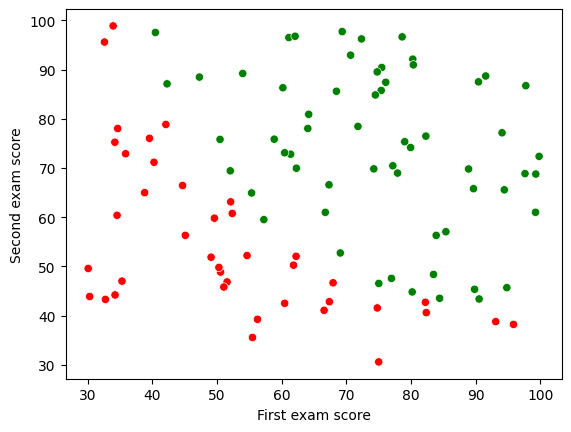

In [389]:
sns.scatterplot(data=exam_df, x='exam_1', y='exam_2', hue='admitted', palette={0: 'red', 1: 'green'}, legend=False)

plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.show()

# 3. Implementation of Logistic Regression from scratch

a) Implement a function which returns sigmoid of a value given the value.

In [390]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

b) Implement the following cost function:

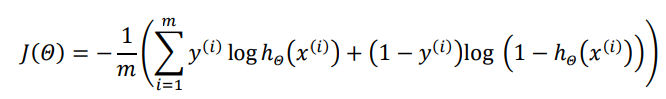

In [391]:
def logistic_cost_function(hypothesis_val, y):
    return (-1 / len(y)) * np.sum(y * np.log(hypothesis_val) + (1 - y) * np.log(1 - hypothesis_val))

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. You should be able to change training step and number of iterations through the variables (or input to the function). In addition, you should save the cost value at each iteration for plotting.

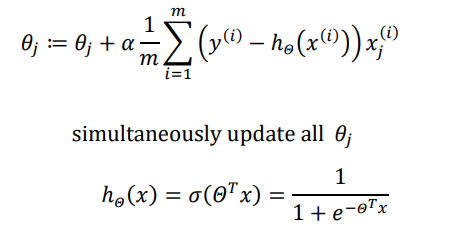

In [392]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        # Get predictions
        hypothesis_val = sigmoid(X @ theta)
        difference = y - hypothesis_val
        
        # Calculate the gradient
        gradient = (1 / m) * (X.T @ difference)
        
        # Update the parameters
        theta = theta + alpha * gradient

        # Save the cost J
        cost = logistic_cost_function(hypothesis_val, y)
        J_history.append(cost)
        
        if (((i + 1) % 10000) == 0):
            print(f"{i + 1}th iteration | cost function:{round(cost, 3)}")

    return theta, J_history

In [393]:
# Prepare features and labels
X0 = np.ones(nexam_df.shape[0])
X1 = np.array(nexam[:, 0])
X2 = np.array(nexam[:, 1])
X = np.column_stack((X0, X1, X2))
y = np.array(nexam[:, 2])

In [394]:
# Initialize theta
n = X.shape[1] # Number of features
theta = np.zeros(n)

In [395]:
# Set learning rate and number of iterations
alpha = 0.01
num_iters = 100000

In [396]:
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

10000th iteration | cost function:0.371
20000th iteration | cost function:0.304
30000th iteration | cost function:0.274
40000th iteration | cost function:0.256
50000th iteration | cost function:0.245
60000th iteration | cost function:0.237
70000th iteration | cost function:0.232
80000th iteration | cost function:0.227
90000th iteration | cost function:0.224
100000th iteration | cost function:0.221


In [397]:
theta

array([-8.18545745,  9.34663335,  8.76613616])

d) Plot the graph of the cost function and describe how it changes over iterations.

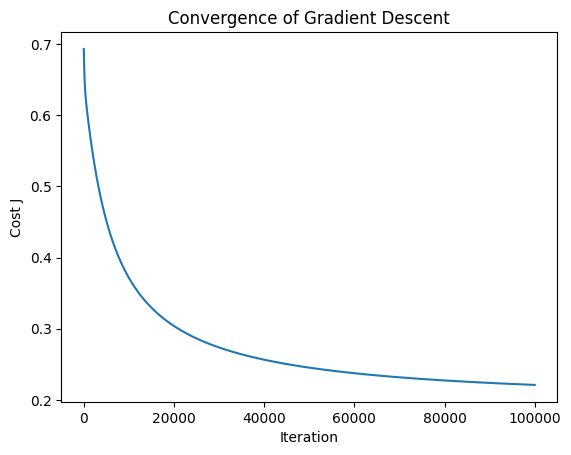

In [398]:
# Plot the cost function
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

The cost function decreases rapidly at first, then gradually levels off, showing convergence as it approaches a minimum.

e) Plot points of the first exam score vs the second exam score. Admitted student points should be green and failed student points should be red. (same as Visualization part). And plot the decision boundary using the parameters found by gradient descent on the same graph.

In [399]:
# Predicted probabilities for exam scores
X2_reg = (-theta[0] * X[:, 0] - theta[1] * X[:, 1]) / theta[2]

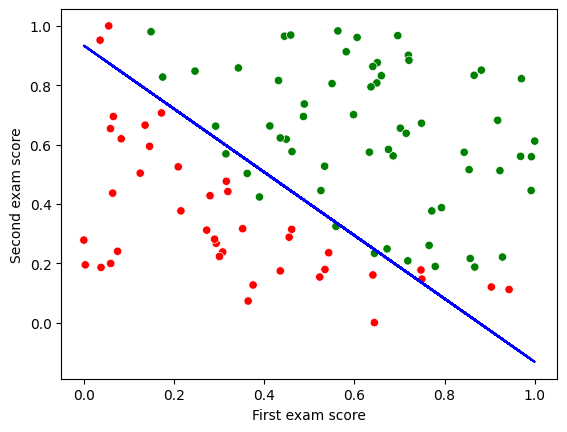

In [400]:
sns.scatterplot(data=nexam_df, x='exam_1', y='exam_2', hue='admitted', palette={0: 'red', 1: 'green'}, legend=False)
plt.plot(X[:, 1], X2_reg, color='blue')

plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.show()

f) Make predictions of the training data using your trained model, compare
predicted labels with actuals label and print the score indicating how well your model performs. You can use accuracy_score function from scikit-learn library. After doing that, check if your model makes correct predictions for these data: {55, 70, 1} and {40, 60, 0}.

In [401]:
def get_predictions(X, theta):
    y_pred_reg = X @ theta
    y_pred = (sigmoid(y_pred_reg) >= 0.5).astype(int)
    
    return y_pred

In [402]:
train_accuracy = accuracy_score(get_predictions(X, theta), y)
train_accuracy

0.89

In [411]:
def predict_new(nX, theta):
    X0_new = np.ones(nX.shape[0])
    X1_new = np.array(nX[:, 0])
    X2_new = np.array(nX[:, 1])
    X_new = np.column_stack((X0_new, X1_new, X2_new))
    
    return get_predictions(X_new, theta)

In [412]:
test_data = np.array([[55, 70], [40, 60]])
nX = scaler.transform(test_data)
results = predict_new(nX, theta)

In [413]:
for i in range(len(results)):
    print(f"Prediction for {test_data[i]}: {results[i]}")

Prediction for [55 70]: 1
Prediction for [40 60]: 0


# 4. Logistic Regression using library 

In [406]:
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [407]:
y_pred = model.predict(X_scaled)

In [409]:
orig_acc = accuracy_score(y, y_pred)
orig_acc

0.93

In [416]:
orig_results = model.predict(nX)

In [417]:
for i in range(len(orig_results)):
    print(f"Prediction for {test_data[i]}: {orig_results[i]}")

Prediction for [55 70]: 1.0
Prediction for [40 60]: 0.0
